<a href="https://colab.research.google.com/github/SatyanarayanaMurthyT/AIML-Projects/blob/ECG-Digitization/ECGDigitization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install wfdb
!pip install qrcode
!pip install validators

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 160.0/160.0 kB 4.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.7/45.7 kB 3.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.5/43.5 kB 2.7 MB/s eta 0:00:00


In [2]:
# prompt: import pandas

import pandas as pd
import IPython
import zipfile
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

In [3]:
!lscpu

print(".......................................")
!lscpu |grep 'Model name'
print(".......................................")
!free -h --si | awk  '/Mem:/{print $2}'



Architecture:             x86_64
  CPU op-mode(s):         32-bit, 64-bit
  Address sizes:          46 bits physical, 48 bits virtual
  Byte Order:             Little Endian
CPU(s):                   2
  On-line CPU(s) list:    0,1
Vendor ID:                GenuineIntel
  Model name:             Intel(R) Xeon(R) CPU @ 2.20GHz
    CPU family:           6
    Model:                79
    Thread(s) per core:   2
    Core(s) per socket:   1
    Socket(s):            1
    Stepping:             0
    BogoMIPS:             4400.42
    Flags:                fpu vme de pse tsc msr pae mce cx8 apic sep mtrr pge mca cmov pat pse36 cl
                          flush mmx fxsr sse sse2 ss ht syscall nx pdpe1gb rdtscp lm constant_tsc re
                          p_good nopl xtopology nonstop_tsc cpuid tsc_known_freq pni pclmulqdq ssse3
                           fma cx16 pcid sse4_1 sse4_2 x2apic movbe popcnt aes xsave avx f16c rdrand
                           hypervisor lahf_lm abm 3dnowprefetch i

In [4]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [5]:
ECGDir="/content/drive/MyDrive/Colab Notebooks/ECGDigitization/ImgFiles/ECGImageAnalysis.zip"
ECGDir

'/content/drive/MyDrive/Colab Notebooks/ECGDigitization/ImgFiles/ECGImageAnalysis.zip'

In [6]:
with zipfile.ZipFile(ECGDir,"r") as zip_ref:
    zip_ref.extractall("./")

In [7]:
!mv "/content/ptb-xl-a-large-publicly-available-electrocardiography-dataset-1.0.3" "/content/ECGImageAnalysis"

mv: cannot stat '/content/ptb-xl-a-large-publicly-available-electrocardiography-dataset-1.0.3': No such file or directory


In [8]:
!cp "/content/drive/MyDrive/Colab Notebooks/ECGDigitization/prepare_ptbxl_data.py" "./ECGImageAnalysis"
!cp "/content/drive/MyDrive/Colab Notebooks/ECGDigitization/st12slv23ToSNOMED.csv" "./ECGImageAnalysis"
!cp "/content/drive/MyDrive/Colab Notebooks/ECGDigitization/st12sl_statements.csv" "./ECGImageAnalysis"
!cp "/content/drive/MyDrive/Colab Notebooks/ECGDigitization/helper_code.py" "./ECGImageAnalysis"
!cp "/content/drive/MyDrive/Colab Notebooks/ECGDigitization/prepare_image_data.py" "./ECGImageAnalysis"
!cp "/content/drive/MyDrive/Colab Notebooks/ECGDigitization/remove_hidden_data.py" "./ECGImageAnalysis"


In [9]:
import os
os.mkdir("./ECGImageAnalysis_script")
!mv "./ECGImageAnalysis/prepare_ptbxl_data.py" "./ECGImageAnalysis_script/"
!mv "./ECGImageAnalysis/st12slv23ToSNOMED.csv" "./ECGImageAnalysis_script/"
!mv "./ECGImageAnalysis/st12sl_statements.csv" "./ECGImageAnalysis_script/"
!mv "./ECGImageAnalysis/helper_code.py" "./ECGImageAnalysis_script/"
!mv "./ECGImageAnalysis/prepare_image_data.py" "./ECGImageAnalysis_script/"
!mv "./ECGImageAnalysis/remove_hidden_data.py" "./ECGImageAnalysis_script/"


In [10]:
"""
!python  ptb-xl/prepare_ptbxl_data.py \
     -i  ptb-xl/records500/ \
     -pd ptb-xl/ptbxl_database.csv \
     -pm ptb-xl/scp_statements.csv \
     -sd ptb-xl/st12sl_statements.csv \
     -sm ptb-xl/st12slv23ToSNOMED.csv \
     -o  ptb-xl/records500_tmp/
"""

'\n!python  ptb-xl/prepare_ptbxl_data.py      -i  ptb-xl/records500/      -pd ptb-xl/ptbxl_database.csv      -pm ptb-xl/scp_statements.csv      -sd ptb-xl/st12sl_statements.csv      -sm ptb-xl/st12slv23ToSNOMED.csv      -o  ptb-xl/records500_tmp/\n'

In [11]:
import os
import shutil
import subprocess
import os
import shutil
import threading

In [12]:
#Generate ECG Images for Analysis
"""
def generateECGImages(image_dir):
 tmp_dir="records500_tmp/"+image_dir
 print("image dir: ",tmp_dir)
 arg1= " -i "+tmp_dir
 arg2= " -o "+tmp_dir
 arg3=" --print_header"
 arg4=" --store_config 2"

 str_arg_cmd="python ptb-xl/gen_ecg_images_from_data_batch.py"+arg1+arg2+arg3+arg4
 print(str_arg_cmd)
 os.system(str_arg_cmd)

def generateECGImagesForDir(image_dir):
  generateECGImages(image_dir)
  shutil.make_archive("ptb-xl/records500_tmp/"+image_dir, 'zip', "ptb-xl/records500_tmp/"+image_dir)
  input_zip="ptb-xl/records500_tmp/"+image_dir+".zip"
  output_zip="/content/drive/MyDrive/Colab Notebooks/ECGDigit ization/Image_Files/"+image_dir+".zip"
  shutil.move(input_zip,output_zip)

list_dir=sorted(os.listdir("ptb-xl/records500_tmp/"))
for image_dir in list_dir[18:]:
  print("image directory: ",image_dir)
  generateECGImagesForDir(image_dir)
"""


'\ndef generateECGImages(image_dir):\n tmp_dir="records500_tmp/"+image_dir\n print("image dir: ",tmp_dir)\n arg1= " -i "+tmp_dir\n arg2= " -o "+tmp_dir\n arg3=" --print_header"\n arg4=" --store_config 2"\n\n str_arg_cmd="python ptb-xl/gen_ecg_images_from_data_batch.py"+arg1+arg2+arg3+arg4\n print(str_arg_cmd)\n os.system(str_arg_cmd)\n\ndef generateECGImagesForDir(image_dir):\n  generateECGImages(image_dir)\n  shutil.make_archive("ptb-xl/records500_tmp/"+image_dir, \'zip\', "ptb-xl/records500_tmp/"+image_dir)\n  input_zip="ptb-xl/records500_tmp/"+image_dir+".zip"\n  output_zip="/content/drive/MyDrive/Colab Notebooks/ECGDigit ization/Image_Files/"+image_dir+".zip"\n  shutil.move(input_zip,output_zip)\n\nlist_dir=sorted(os.listdir("ptb-xl/records500_tmp/"))\nfor image_dir in list_dir[18:]:\n  print("image directory: ",image_dir)\n  generateECGImagesForDir(image_dir)\n'

In [13]:
#Generate ECG Images for Analysis

def generateECGInfoForDir(image_dir):
 tmp_dir="ECGImageAnalysis/"+image_dir
 print("image dir: ",tmp_dir)
 arg1= " -i "+tmp_dir
 arg2= " -o "+tmp_dir

 str_arg_cmd="python ECGImageAnalysis_script/prepare_image_data.py"+arg1+arg2
 print(str_arg_cmd)
 os.system(str_arg_cmd)


list_dir=sorted(os.listdir("./ECGImageAnalysis/"))
for image_dir in list_dir:
  print("image directory: ",image_dir)
  generateECGInfoForDir(image_dir)


image directory:  00000
image dir:  ECGImageAnalysis/00000
python ECGImageAnalysis_script/prepare_image_data.py -i ECGImageAnalysis/00000 -o ECGImageAnalysis/00000
image directory:  01000
image dir:  ECGImageAnalysis/01000
python ECGImageAnalysis_script/prepare_image_data.py -i ECGImageAnalysis/01000 -o ECGImageAnalysis/01000
image directory:  02000
image dir:  ECGImageAnalysis/02000
python ECGImageAnalysis_script/prepare_image_data.py -i ECGImageAnalysis/02000 -o ECGImageAnalysis/02000
image directory:  03000
image dir:  ECGImageAnalysis/03000
python ECGImageAnalysis_script/prepare_image_data.py -i ECGImageAnalysis/03000 -o ECGImageAnalysis/03000
image directory:  04000
image dir:  ECGImageAnalysis/04000
python ECGImageAnalysis_script/prepare_image_data.py -i ECGImageAnalysis/04000 -o ECGImageAnalysis/04000
image directory:  05000
image dir:  ECGImageAnalysis/05000
python ECGImageAnalysis_script/prepare_image_data.py -i ECGImageAnalysis/05000 -o ECGImageAnalysis/05000
image directory:

<Figure size 640x480 with 0 Axes>

(0.0, 256.0)

(0.0, 256.0)

(0.0, 256.0)

Text(0.5, 1.0, 'Histogram for Color Image')

Text(0.5, 0, 'Intensity')

Text(0, 0.5, 'Pixel Count')

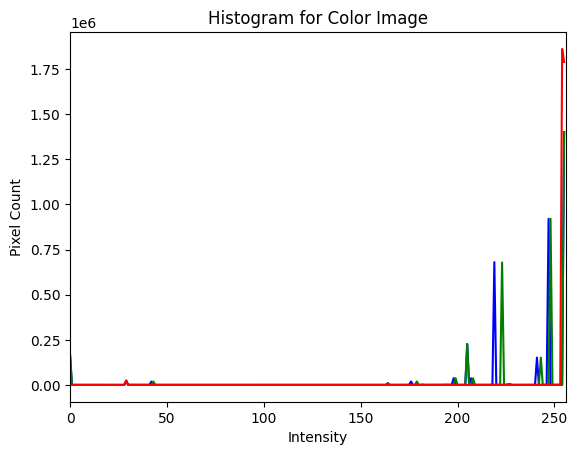

In [33]:

import cv2
import matplotlib.pyplot as plt

img = cv2.imread('./ECGImageAnalysis/00000/00001_hr-0.png')

# Calculate and plot histograms for each color channel
color = ('b', 'g', 'r')
plt.figure()
for i, col in enumerate(color):
    histr = cv2.calcHist([img], [i], None, [256], [0, 256])
    plt.plot(histr, color=col)
    plt.xlim([0, 256])
plt.title('Histogram for Color Image')
plt.xlabel('Intensity')
plt.ylabel('Pixel Count')
plt.show()

<Figure size 640x480 with 0 Axes>

(0.0, 256.0)

(0.0, 256.0)

(0.0, 256.0)

Text(0.5, 1.0, 'Histogram for Color Image')

Text(0.5, 0, 'Intensity')

Text(0, 0.5, 'Pixel Count')

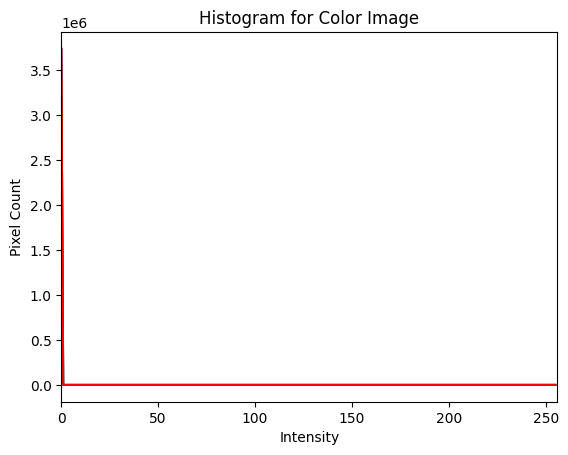

In [38]:
from google.colab.patches import cv2_imshow

img = cv2.imread('./ECGImageAnalysis/00000/00001_hr-0.png')

# Set the threshold value (adjust as needed)
threshold_value = 150

# Create a mask where pixel values are greater than the threshold
mask = cv2.inRange(img, threshold_value, 255)

# Apply the mask to the original image
img = cv2.bitwise_and(img, img, mask=mask)

# Display the original and thresholded images
color = ('b', 'g', 'r')
plt.figure()
for i, col in enumerate(color):
    histr = cv2.calcHist([img], [i], None, [256], [0, 256])
    plt.plot(histr, color=col)
    plt.xlim([0, 256])
plt.title('Histogram for Color Image')
plt.xlabel('Intensity')
plt.ylabel('Pixel Count')
plt.show()


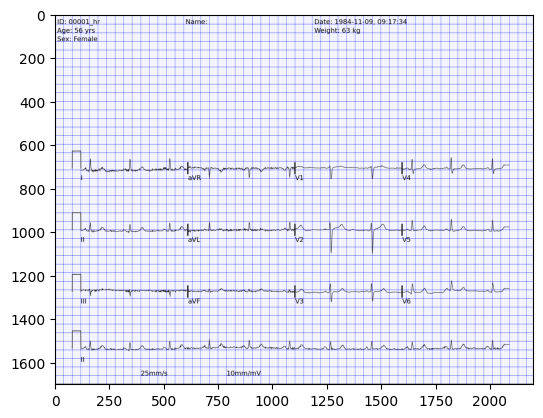

In [22]:
plt.imshow(img)